<a href="https://colab.research.google.com/github/WatchTheory/Iowa-Housing/blob/main/Iowa_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

> Primary Objective:
- Understand the Ames Housing dataset through EDA. 📊
- Perform any necessary data cleaning and feature engineering. 🧹
- Prepare a clean dataset for modeling. ✔️

#Task 2a: Install the Needed Libraries

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl

In [2]:
# Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    # linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingRegressor    # Boosting Regressor
from sklearn.ensemble import RandomForestRegressor            # Random Forest
from bokeh.plotting import figure, show

#Task 2b: Import the Needed Libraries

In [3]:
# Set option to display all rows (if your output from isna().sum() is very long)
pd.set_option('display.max_rows', None)

# Setting df head to all show all columns
pd.set_option('display.max_columns', None)

#Task 3: Load the Data

In [4]:
df_data = pd.read_csv('ameshousing.csv')

In [5]:
df_data_copy = pd.read_csv('ameshousing.csv')

In [6]:
df_data_backup = pd.read_csv('ameshousing.csv')

In [7]:
df_data.head(7)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500


In [8]:
df_data_copy.head(7)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [9]:
# Identify all columns that have Na Values and add it to a list

dataset_columns = df_data.columns[df_data.isna().any()].tolist()

In [10]:
dataset_columns

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

##Get Data Info

In [11]:
df_data.dtypes

,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object


In [12]:
df_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

##Find Missing Values

In [13]:
# Put all numerica columns into a list
num_columns = df_data.select_dtypes(include=['int64','float64']).columns.tolist()

In [14]:
# Put all the categorical columns into a list
cat_columns = df_data.select_dtypes(include=['object']).columns.tolist()

In [15]:
# numerical
num_columns

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [16]:
# categorical
cat_columns

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [17]:
# Removing SalePrice for the features list
if 'SalePrice' in num_columns:
    num_columns.remove('SalePrice')

In [18]:
# print the numerica and categorical list
print("\nNumeric columns   :", num_columns)
print("Categorical columns:", cat_columns)


Numeric columns   : ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
Categorical columns: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heati

## Create subset of missing values

In [19]:
# create subset dataframe of all NaNa values
# two parts
df_na_values = df_data[['Lot Frontage', 'Alley' , 'Mas Vnr Type' , 'Mas Vnr Area' , 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Pool QC', 'Fence', 'Misc Feature']]


In [20]:
# create subset dataframe of all NaNa values
df_na_values2 = df_data[['Garage Qual', 'Garage Cond' , 'Garage Finish' , 'Garage Yr Blt' , 'Garage Type' , 'Fireplace Qu' ,'Bsmt Half Bath','Bsmt Full Bath', 'Garage Cars','Garage Area']]

In [21]:
# creating subset dataframe of NaNa values
df_na_values3 = df_data[['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style']]

In [22]:
# creating subset dataframe of NaNa values
df_na_values4 = df_data[['Roof Matl' , 'Exterior 1st', 'Exter Qual', 'Exter Cond' , 'Heating', 'Heating QC' , 'Central Air' , 'Functional', 'Sale Type', 'Sale Condition']]

In [23]:
# Calculate the average SalePrice for houses with and without Central Air
sale_price_by_central_air = df_data.groupby('Central Air')['SalePrice'].mean().reset_index()

# Display the results
print(f"Average SalePrice by Central Air:")
display(sale_price_by_central_air)

Average SalePrice by Central Air:


,Central Air,SalePrice
0,N,101890.479592
1,Y,186452.787857


In [24]:
# look at all the houses built before 1918
df_pre_1918 = df_data[df_data['Year Built'] < 1918]

In [25]:
# looking for all the abnormal houes within that period before 1918
df_pre_1918_abnorml = df_pre_1918[df_pre_1918['Sale Condition'] == 'Abnorml']

In [26]:
# print out all the information
print(f"Total abnormal sales for houses built before 1918: {len(df_pre_1918_abnorml)}")
print(f"First 5 rows of abnormal sales for houses built before 1918:")
print(df_pre_1918_abnorml.head())

Total abnormal sales for houses built before 1918: 18
First 5 rows of abnormal sales for houses built before 1918:
     Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
169    170  902102100           50        RM          60.0      4800   Pave   
183    184  902305110           70        RM          60.0      9600   Pave   
186    187  902401060          190        RM         100.0      9045   Pave   
213    214  904351040           70   C (all)           NaN      6449   Pave   
305    306  911202100           50   C (all)          66.0      8712   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
169   NaN       Reg          Lvl    AllPub     Corner        Gtl      OldTown   
183  Grvl       Reg          Lvl    AllPub     Corner        Gtl      OldTown   
186   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
213   NaN       IR1          Lvl    AllPub     Inside        Gtl        SWISU   
305  

In [27]:
# After all cleaning
print("Any NaNs from bad conversion?")
print(df_data[['MS Zoning', 'Neighborhood', 'Street']].head())
print("\nNaN count in key categoricals:")
print(df_data[['MS Zoning', 'Neighborhood']].isna().sum())

Any NaNs from bad conversion?
  MS Zoning Neighborhood Street
0        RL        NAmes   Pave
1        RH        NAmes   Pave
2        RL        NAmes   Pave
3        RL        NAmes   Pave
4        RL      Gilbert   Pave

NaN count in key categoricals:
MS Zoning       0
Neighborhood    0
dtype: int64


### Check after creating subsets

In [28]:
df_data.isna().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
Lot Area,0
Street,0
Alley,2732
Lot Shape,0
Land Contour,0


#Task 5: Perform Data Cleaning

#### Numeric - Convert Numeric columns

In [30]:
num_columns

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [31]:
num_columns

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [32]:
# converting numeric columns
df_data['Order'] = pd.to_numeric(df_data['Order'], errors='coerce')
df_data['PID'] = pd.to_numeric(df_data['PID'], errors='coerce')
df_data['MS SubClass'] = pd.to_numeric(df_data['MS SubClass'], errors='coerce')
df_data['Lot Frontage'] = pd.to_numeric(df_data['Lot Frontage'], errors='coerce')
df_data['Lot Area'] = pd.to_numeric(df_data['Lot Area'], errors='coerce')
df_data['Overall Qual'] = pd.to_numeric(df_data['Overall Qual'], errors='coerce')
df_data[ 'Overall Cond'] = pd.to_numeric(df_data[ 'Overall Cond'], errors='coerce')
df_data['Year Built'] = pd.to_numeric(df_data['Year Built'], errors='coerce')
df_data['Year Remod/Add'] = pd.to_numeric(df_data['Year Remod/Add'], errors='coerce')
df_data['Mas Vnr Area'] = pd.to_numeric(df_data['Mas Vnr Area'], errors='coerce')
df_data['BsmtFin SF 1'] = pd.to_numeric(df_data['BsmtFin SF 1'], errors='coerce')
df_data['BsmtFin SF 2'] = pd.to_numeric(df_data['BsmtFin SF 2'], errors='coerce')
df_data['Bsmt Unf SF'] = pd.to_numeric(df_data['Bsmt Unf SF'], errors='coerce')
df_data['Total Bsmt SF'] = pd.to_numeric(df_data['Total Bsmt SF'], errors='coerce')
df_data['1st Flr SF'] = pd.to_numeric(df_data['1st Flr SF'], errors='coerce')
df_data['2nd Flr SF'] = pd.to_numeric(df_data['2nd Flr SF'], errors='coerce')
df_data['Low Qual Fin SF'] = pd.to_numeric(df_data['Low Qual Fin SF'], errors='coerce')
df_data['Gr Liv Area'] = pd.to_numeric(df_data['Gr Liv Area'], errors='coerce')
df_data['Bsmt Full Bath'] = pd.to_numeric(df_data['Bsmt Full Bath'], errors='coerce')
df_data['Bsmt Half Bath'] = pd.to_numeric(df_data['Bsmt Half Bath'], errors='coerce')
df_data['Full Bath'] = pd.to_numeric(df_data['Full Bath'], errors='coerce')
df_data['Bedroom AbvGr'] = pd.to_numeric(df_data['Bedroom AbvGr'], errors='coerce')
df_data['Kitchen AbvGr'] = pd.to_numeric(df_data['Kitchen AbvGr'], errors='coerce')
df_data['TotRms AbvGrd'] = pd.to_numeric(df_data['TotRms AbvGrd'], errors='coerce')
df_data['Fireplaces'] = pd.to_numeric(df_data['Fireplaces'], errors='coerce')
df_data['Garage Yr Blt'] = pd.to_numeric(df_data['Garage Yr Blt'], errors='coerce')
df_data['Garage Cars'] = pd.to_numeric(df_data['Garage Cars'], errors='coerce')
df_data['Garage Area'] = pd.to_numeric(df_data['Garage Area'], errors='coerce')
df_data['Wood Deck SF'] = pd.to_numeric(df_data['Wood Deck SF'], errors='coerce')
df_data['Open Porch SF'] = pd.to_numeric(df_data['Open Porch SF'], errors='coerce')
df_data['Enclosed Porch'] = pd.to_numeric(df_data['Enclosed Porch'], errors='coerce')
df_data['3Ssn Porch'] = pd.to_numeric(df_data['3Ssn Porch'], errors='coerce')
df_data['Screen Porch'] = pd.to_numeric(df_data['Screen Porch'], errors='coerce')
df_data['Pool Area'] = pd.to_numeric(df_data['Pool Area'], errors='coerce')
df_data['Misc Val'] = pd.to_numeric(df_data['Misc Val'], errors='coerce')
df_data['Mo Sold'] = pd.to_numeric(df_data['Mo Sold'], errors='coerce')
df_data['Yr Sold'] = pd.to_numeric(df_data['Yr Sold'], errors='coerce')
df_data['Central Air'] = pd.to_numeric(df_data['Central Air'], errors='coerce')

In [34]:
# Fill categorical columns safely
categorical_cols = df_data.select_dtypes(include='object').columns
df_data[categorical_cols] = df_data[categorical_cols].fillna('None')

In [35]:
# Display the updated converted columns
df_data.dtypes

,0
Order,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object


### Data Cleaning

In [36]:
# checking if columns is null or not, display the total amount of values
# shows the total missing values
whole_dataset = df_data.isna().sum().sum()
print(f"Whole Dataset: {whole_dataset}")

Whole Dataset: 3612


In [37]:
# numeric columns inside the subsets
for subset in [df_na_values, df_na_values2, df_na_values3, df_na_values4]:
    num_in_subset = [col for col in subset.columns if col in num_columns]
    cat_in_subset = [col for col in subset.columns if col in cat_columns]

    # fill numeric colunms with 0
    subset.loc[:, num_in_subset] = subset[num_in_subset].fillna(0)

    # fill categorical columns with the string 'None'
    subset.loc[:, cat_in_subset] = subset[cat_in_subset].fillna('None')

/tmp/ipython-input-453801260.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, cat_in_subset] = subset[cat_in_subset].fillna('None')
/tmp/ipython-input-453801260.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, cat_in_subset] = subset[cat_in_subset].fillna('None')


In [38]:
# Writing those df_na_values columns back into the df_data
df_data[df_na_values.columns]  = df_na_values
df_data[df_na_values2.columns] = df_na_values2
df_data[df_na_values3.columns] = df_na_values3
df_data[df_na_values4.columns] = df_na_values4

In [39]:
print(f"NaNs after cleaning:", df_data.isna().sum().sum())

NaNs after cleaning: 0


In [40]:
# The whole dataset columns
df_data.isna().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
Lot Area,0
Street,0
Alley,0
Lot Shape,0
Land Contour,0


#### Outliers

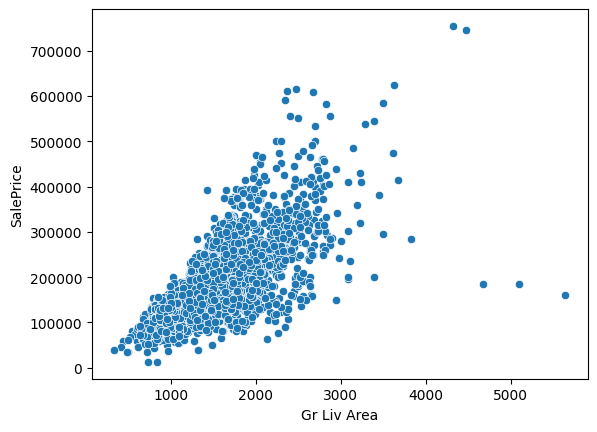

In [41]:
# Quick EDA plot to spot (optional, uses seaborn)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_data)
plt.show()  # Look for points >4000 SF or < $50k price

In [42]:
# Remove top outliers
df_data = df_data[df_data['Gr Liv Area'] < 4000]  # Removes ~5 rows

In [43]:
num_columns

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

#Task 6: Visualize Cleaned up Dataset

#### List of Columns

In [44]:
# From df_na_values
basements = df_data[['Bsmt Qual','Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]
house = df_data[['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area','Electrical', 'Pool QC', 'Fence', 'Misc Feature']]

# From df_na_values2
garage = df_data[['Garage Qual', 'Garage Cond', 'Garage Finish', 'Garage Yr Blt', 'Garage Type', 'Garage Cars', 'Garage Area', 'Exterior 1st' ]]
house_1 = df_data[['Fireplace Qu', 'Bsmt Half Bath', 'Bsmt Full Bath']]

# From df_na_value3
land_area = df_data[['MS Zoning', 'Street', 'Lot Shape', 'Land Contour','Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2']]
house_2 = df_data[['Utilities', 'Bldg Type','House Style', 'Roof Style']]

# From df_na_value4
house_3 = df_data[['Roof Matl', 'Exterior 1st', 'Exter Qual', 'Exter Cond', 'Heating','Heating QC', 'Central Air', 'Functional', 'Sale Type','Sale Condition']]


data_house =  df_data[['MS Zoning', 'Street', 'Lot Shape', 'Land Contour','Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2','Utilities']]

#data_house_2 = df_data[['Gr Liv Area']]
sale_house = df_data[['Sale Condition','Sale Type','Central Air','Heating']]


In [45]:
# 8 Features columns -- Created a new subset this one with on 8 columns
feat_columns = df_data[['SalePrice','Lot Area','Year Built','Full Bath','Central Air', 'Fireplaces','Utilities', 'Lot Frontage','Screen Porch','Wood Deck SF']]

Homes = df_data[['Neighborhood', 'SalePrice']]

In [46]:
# convert 'Central Air'  to numeric
# fill in 'Central Air' with 1
feat_columns['Central Air'] = pd.to_numeric(df_data['Central Air'], errors='coerce')
feat_columns['Central Air'] = feat_columns['Central Air'].fillna(1)


/tmp/ipython-input-433126745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_columns['Central Air'] = pd.to_numeric(df_data['Central Air'], errors='coerce')
/tmp/ipython-input-433126745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_columns['Central Air'] = feat_columns['Central Air'].fillna(1)


In [47]:
# shows the total missing values
whole_dataset = df_data.isna().sum().sum()
print(f"Whole Dataset: {whole_dataset}")

Whole Dataset: 0


## Visualization

From Sale Condition graph, tons of Warrenty Deed - house, lots of house might expensive remodeling or updating for newer buyers.
This insight suggest that these house are much older house that don't have much
features house built today.

More insight suggest that these house are mostly on flat/level land and for sale or some even abandaned.



<Axes: xlabel='Wood Deck SF', ylabel='Lot Frontage'>

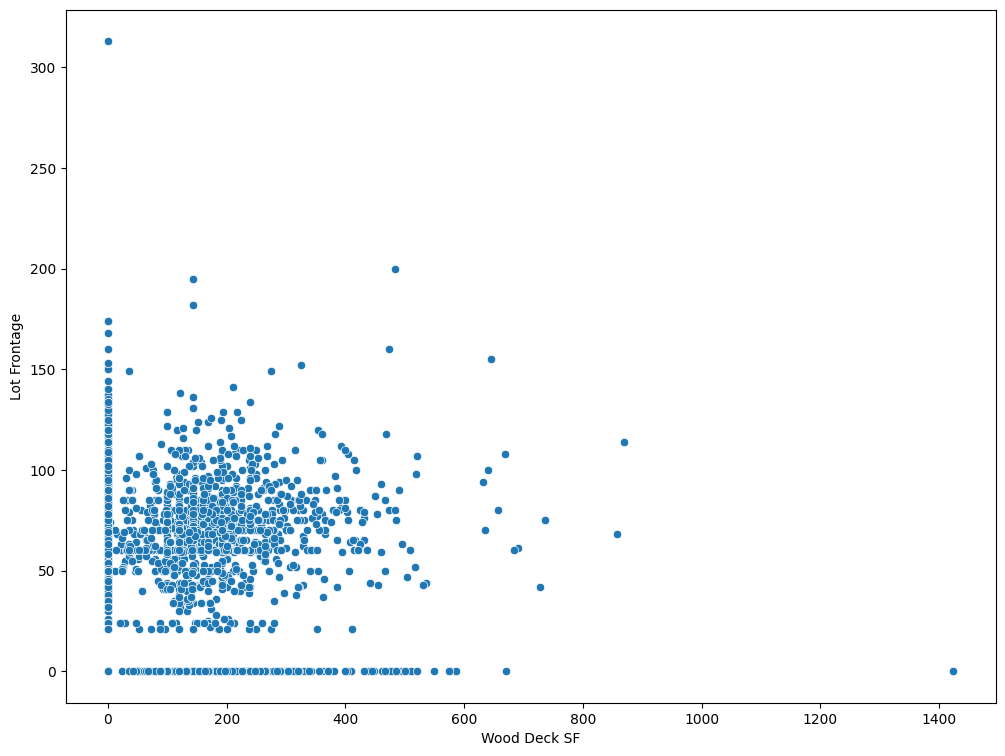

In [48]:
# Lot Frontage by Wood Desk Surface
plt.figure(figsize=(12,9))
sns.scatterplot(data=feat_columns,
            x ='Wood Deck SF',
            y ='Lot Frontage')

<Axes: xlabel='Full Bath', ylabel='Lot Area'>

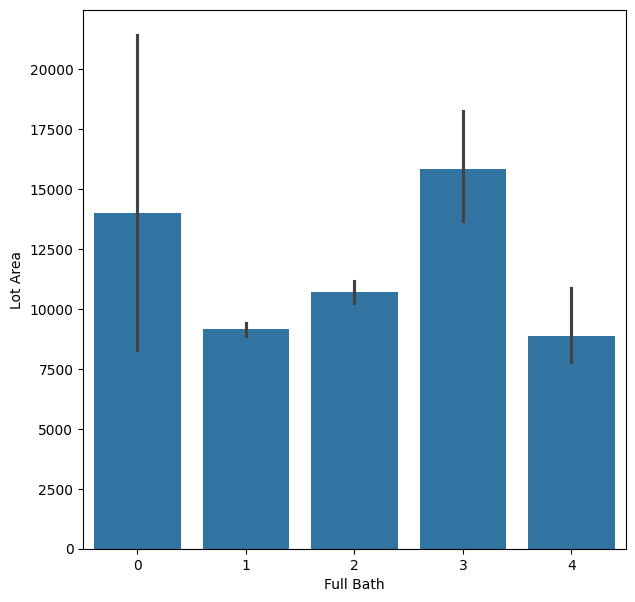

In [49]:
# Showing the relationship between lot and the number of full baths
plt.figure(figsize=(7,7))
sns.barplot(data=feat_columns,
                 x='Full Bath',
                 y='Lot Area')

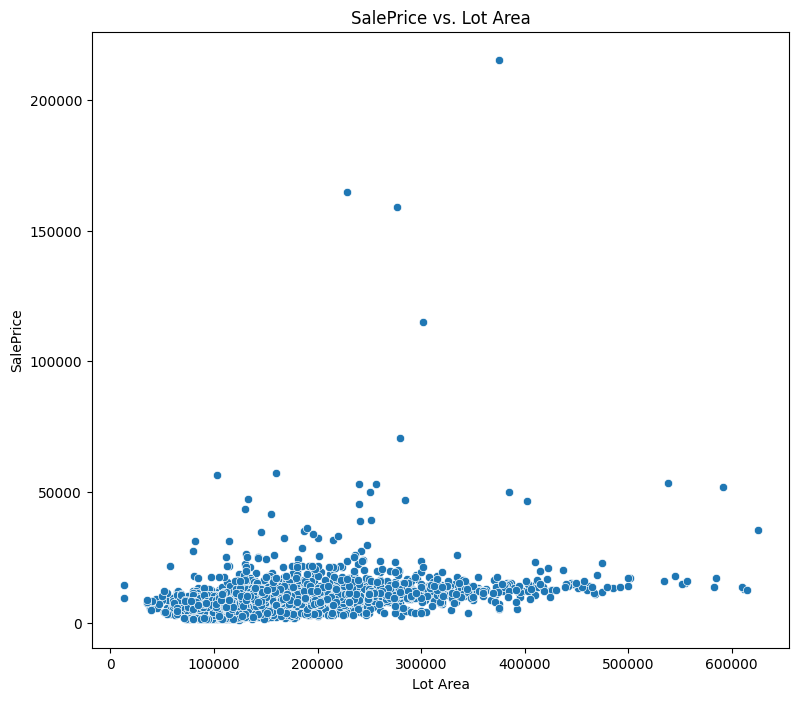

In [50]:
# Ssale Price by Lot Area
plt.figure(figsize=(9,8))
sns.scatterplot(data=feat_columns,
            x='SalePrice',
            y='Lot Area')

plt.title('SalePrice vs. Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Utilities'>

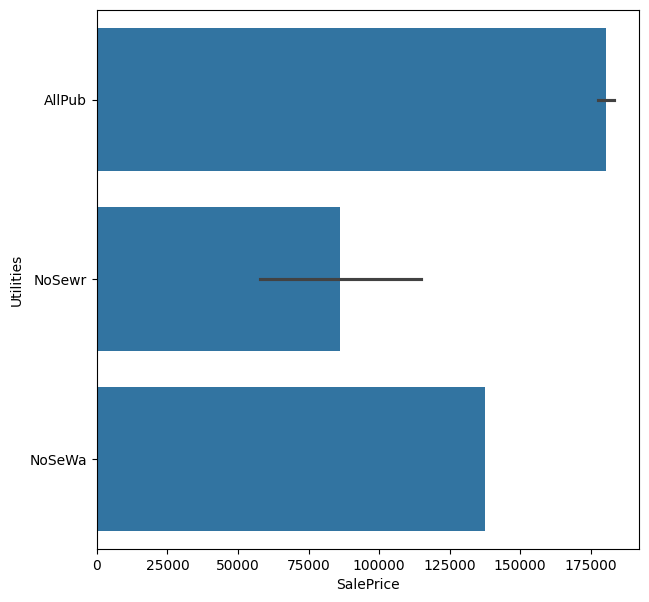

In [51]:
plt.figure(figsize=(7,7))
sns.barplot(data=feat_columns,
             x='SalePrice',
             y='Utilities')

<Axes: xlabel='Year Built', ylabel='Lot Area'>

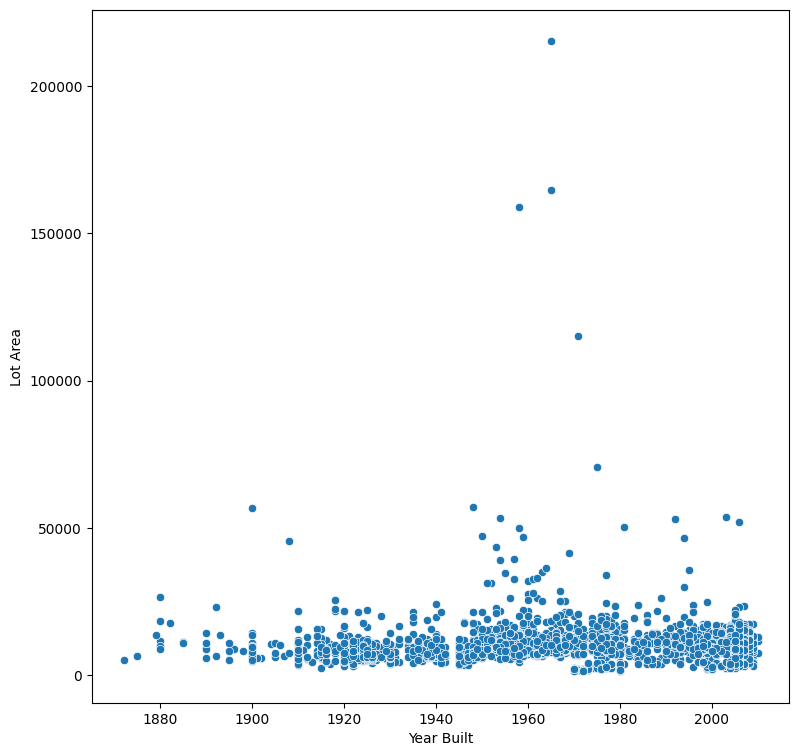

In [52]:
# Lot Area amount by Year Built
plt.figure(figsize=(9,9))
sns.scatterplot(data=feat_columns,
            x = 'Year Built',
            y = 'Lot Area')

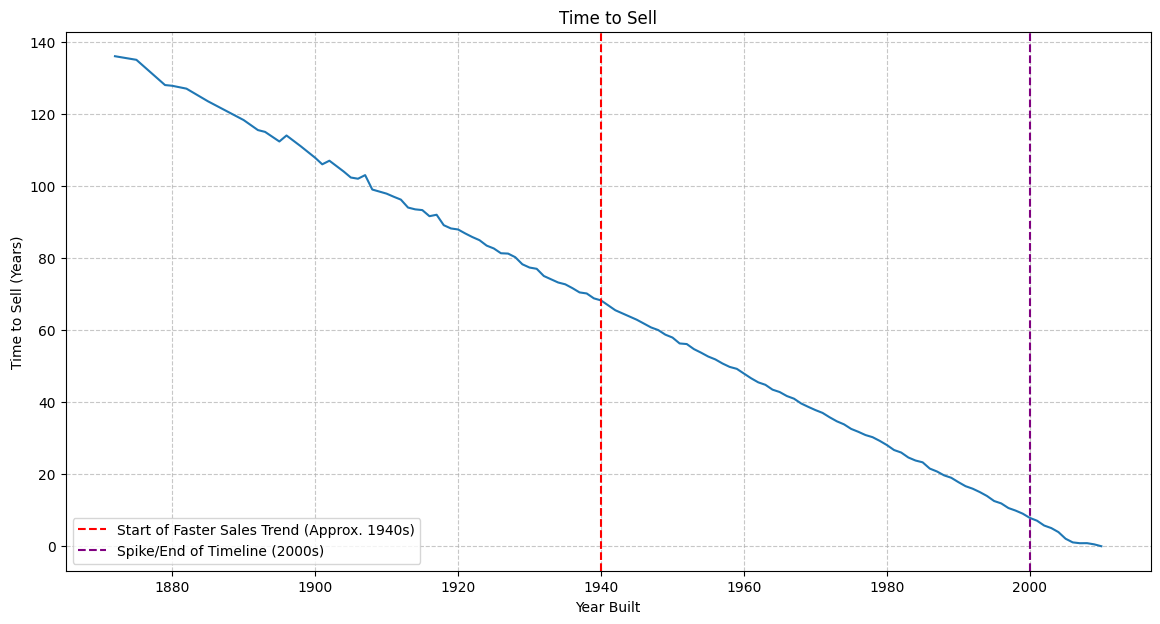

In [53]:
# Calculate 'Time to Sell'
df_data['Time_to_Sell'] = df_data['Yr Sold'] - df_data['Year Built']

# Create a line plot to visualize 'Year Built' vs 'Time to Sell'
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_data, x='Year Built', y='Time_to_Sell', errorbar=None)

plt.title('Time to Sell')
plt.xlabel('Year Built')
plt.ylabel('Time to Sell (Years)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=1940, color='red', linestyle='--', label='Start of Faster Sales Trend (Approx. 1940s)')
plt.axvline(x=2000, color='purple', linestyle='--', label='Spike/End of Timeline (2000s)')
plt.legend()
plt.show()

This graph visualizes the number of years it took for a house to sell based on its construction year. You can observe the trend of decreasing 'Time to Sell' for houses built in later years, particularly post-1940, and any specific behaviors around the 2000s towards the end of the timeline.

Text(0.5, 1.0, 'Overall Quality of Lot Frontage Aea')

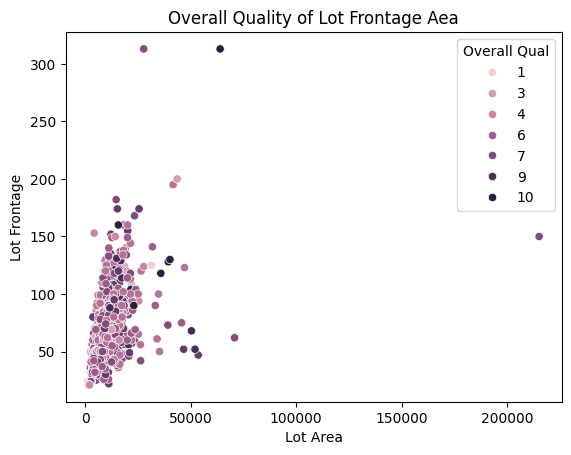

In [54]:
sns.scatterplot(data=df_data_copy,
            x='Lot Area',
            y='Lot Frontage',
            hue='Overall Qual')
plt.title('Overall Quality of Lot Frontage Aea')

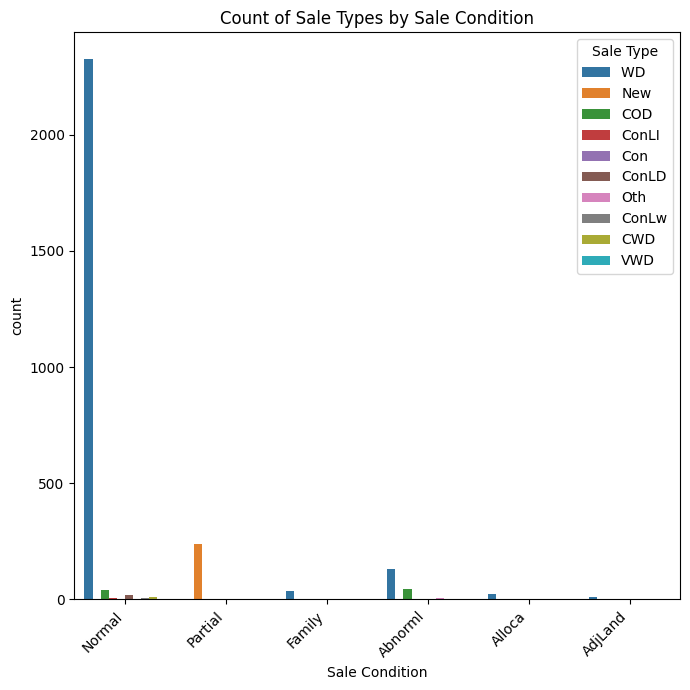

In [55]:
plt.figure(figsize=(7,7))
sns.countplot(data=df_data_copy,
              x='Sale Condition',
              hue='Sale Type') # Use hue to show the counts of each Sale Type for each Sale Condition

plt.title("Count of Sale Types by Sale Condition")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Normal	Normal Sale
# Abnorml	Abnormal Sale -  trade, foreclosure, short sale
# AdjLand	Adjoining Land Purchase
# Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
# Family	Sale between family members
# Partial	Home was not completed when last assessed (associated with New Homes)

<Axes: xlabel='Land Contour', ylabel='Fence'>

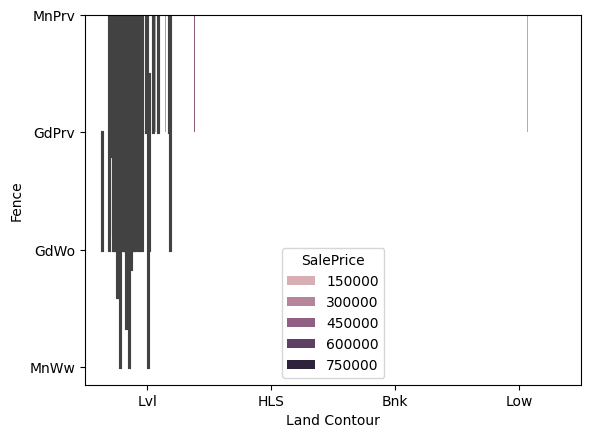

In [56]:
sns.barplot(data=df_data_copy,
             x='Land Contour',
            y='Fence',
            hue='SalePrice')
# Lvl	Near Flat/Level
# Bnk	Banked - Quick and significant rise from street grade to building
# HLS	Hillside - Significant slope from side to side
# Low	Depression

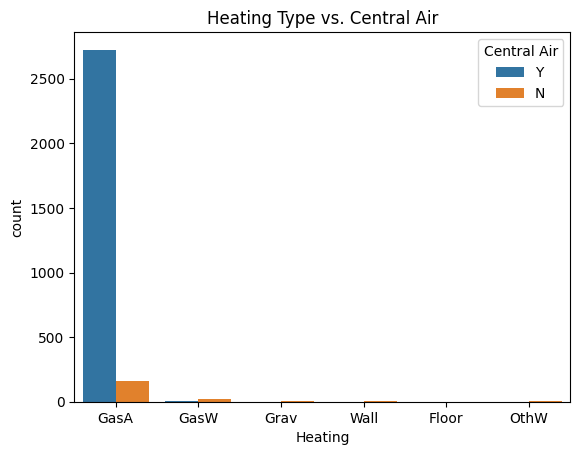

In [57]:
sns.countplot(data=df_data_copy,
              x='Heating',
              hue='Central Air')

# Gas forced warm air furnace
plt.title('Heating Type vs. Central Air')
plt.show()

Home built from 1958 and onwards have more modern A/C systems compared to house in the 1910's to 1940s have natural cooling elements,such as high ceilings to move for more air circulation


In [58]:
num_columns

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

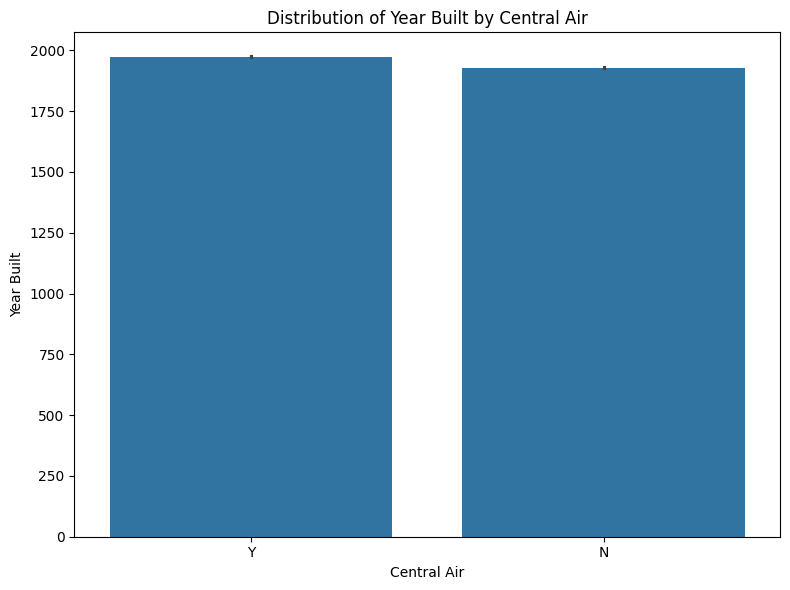

In [59]:
# Create a boxplot of Year Built by Central Air
plt.figure(figsize=(8, 6))
sns.barplot(data=df_data_copy,
            x='Central Air',
            y='Year Built')

plt.title('Distribution of Year Built by Central Air')
plt.xlabel('Central Air')
plt.ylabel('Year Built')
plt.tight_layout()
plt.show()

As you can see, there's a significant difference in average sale price based on whether a house has central air.

/tmp/ipython-input-1843367578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Central Air', y='SalePrice', data=sale_price_by_central_air, palette='viridis')


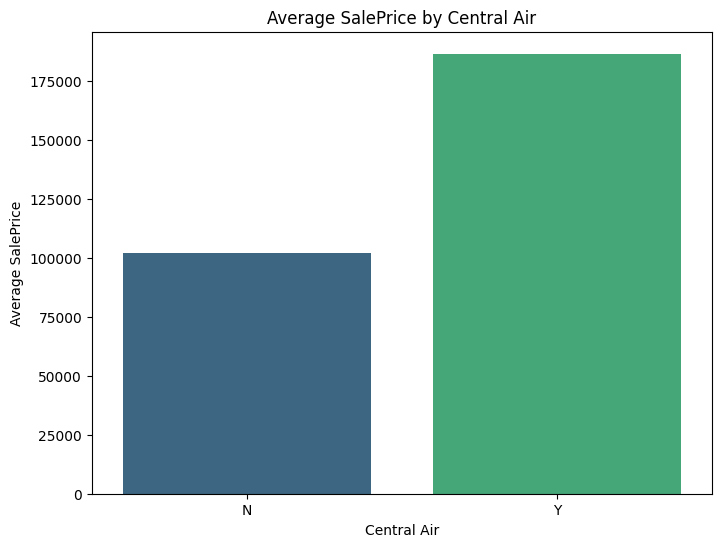

In [60]:
# Create a bar plot to visualize the average SalePrice by Central Air
plt.figure(figsize=(8, 6))
sns.barplot(x='Central Air', y='SalePrice', data=sale_price_by_central_air, palette='viridis')
plt.title('Average SalePrice by Central Air')
plt.xlabel('Central Air')
plt.ylabel('Average SalePrice')
plt.show()

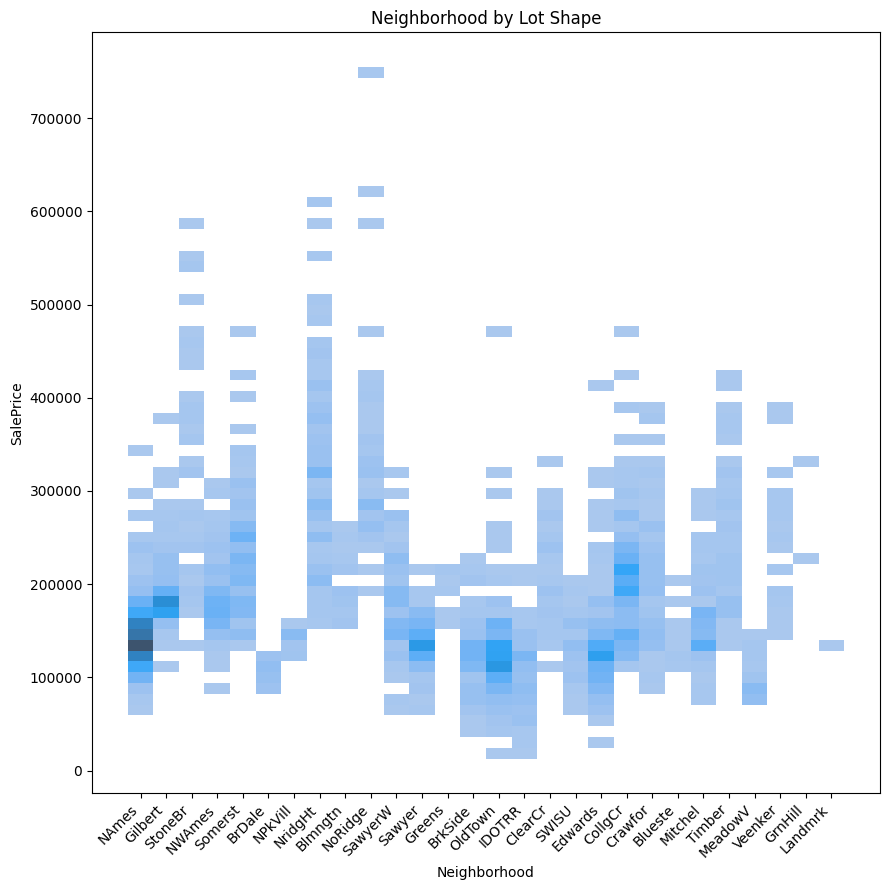

In [61]:
plt.figure(figsize=(9,9))
sns.histplot(data=df_data_copy,
              x='Neighborhood',
              y='SalePrice')
plt.title("Neighborhood by Lot Shape")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [62]:
homes_area = ['Sawyer','Greens','BrkSide','Old Town','IDOTRR','ClearCr','SWISU']

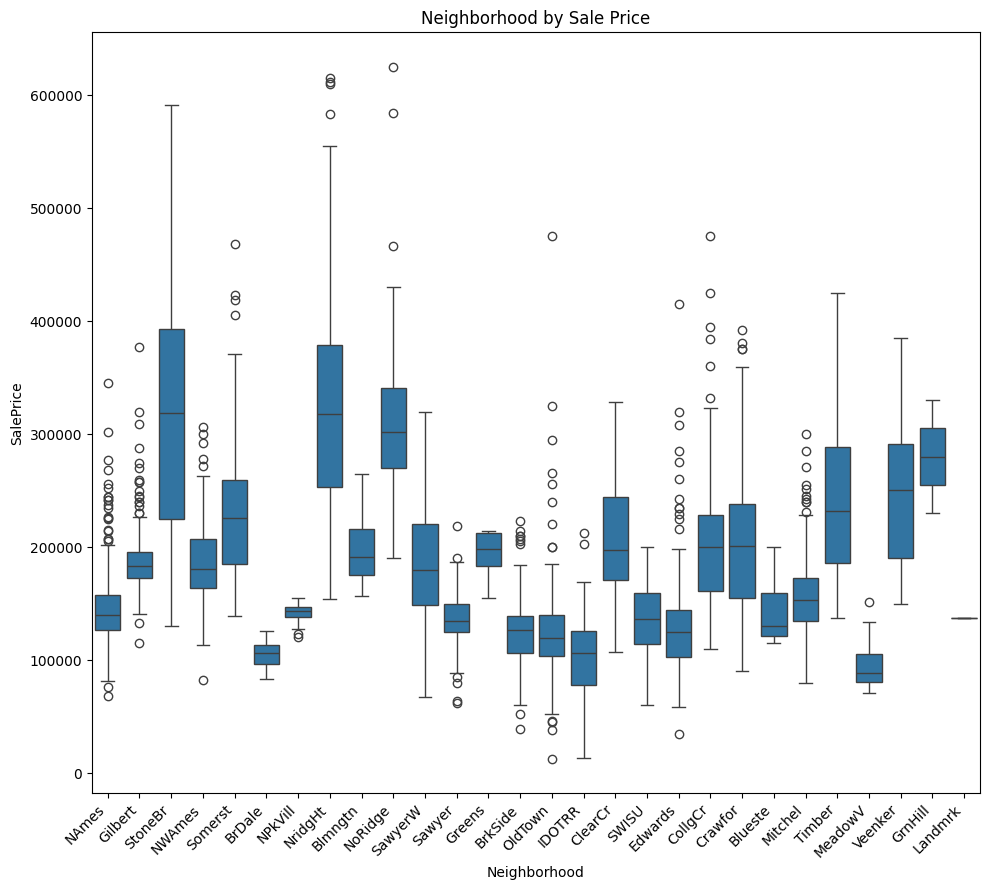

In [63]:
plt.figure(figsize=(10,9))
sns.boxplot(data=Homes,
             x='Neighborhood',
             y='SalePrice')

plt.title("Neighborhood by Sale Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

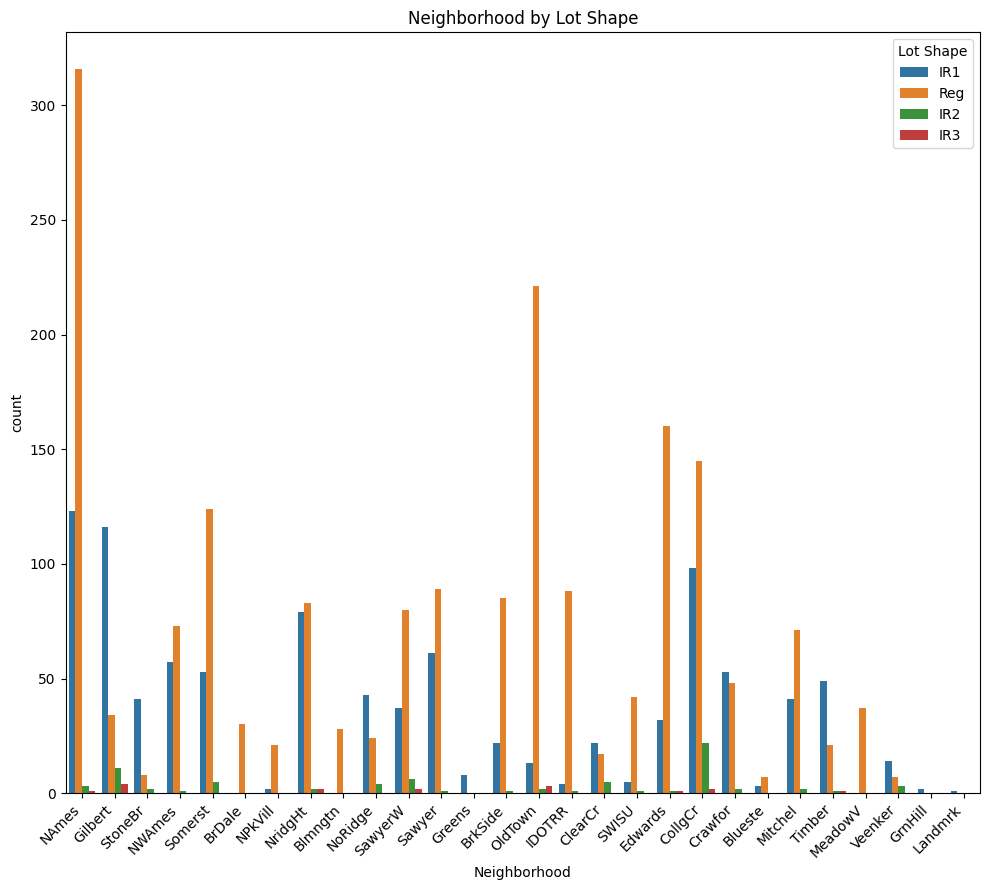

In [64]:
plt.figure(figsize=(10,9))
sns.countplot(data=df_data_copy,
              x='Neighborhood',
              hue='Lot Shape')
plt.title("Neighborhood by Lot Shape")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

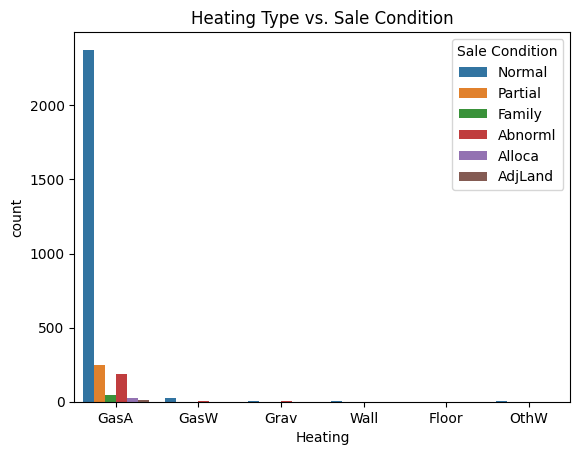

In [65]:
sns.countplot(data=df_data_copy,
              x='Heating',
              hue='Sale Condition') # Use 'Sale Condition' as the hue

plt.title('Heating Type vs. Sale Condition')
plt.show() # (Or plt.savefig('heating_vs_sale_condition.png'))

Starting around 1940s, houses built in the later years sold more quickly

Text(0.5, 1.0, 'Year Built vs Year Sold')

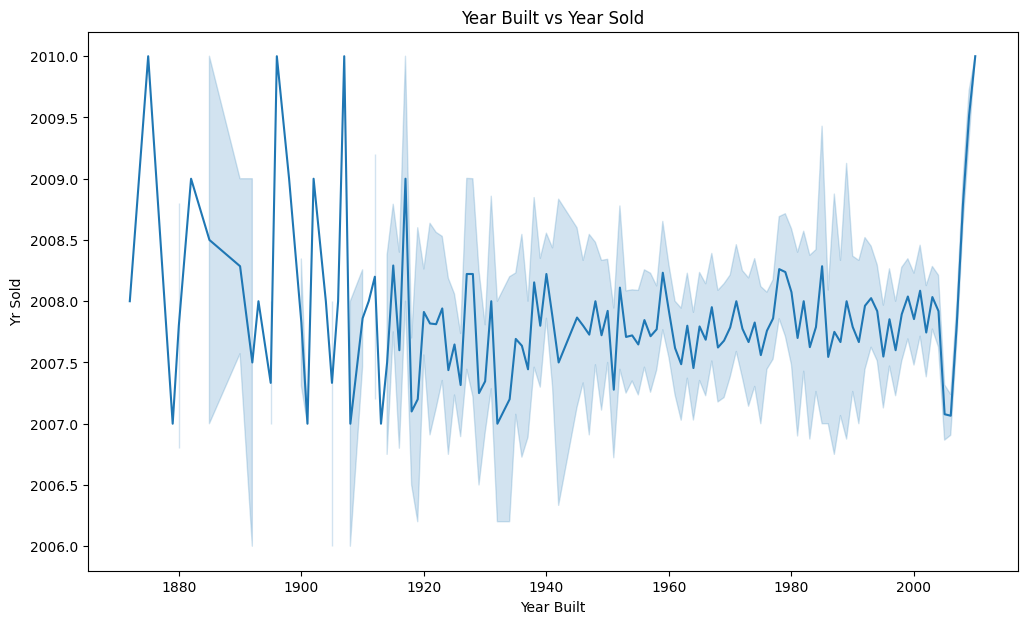

In [66]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_data_copy,
             x='Year Built',
             y='Yr Sold',
             )

plt.title("Year Built vs Year Sold")

Rapidy growth starting around 1950 which indicates a few things
  - surage demand for houses in the early 2000s
  - rapid delay in building and selling houses in the late 1800 and early 1900s


Text(0.5, 1.0, 'Year Built and Remodeled')

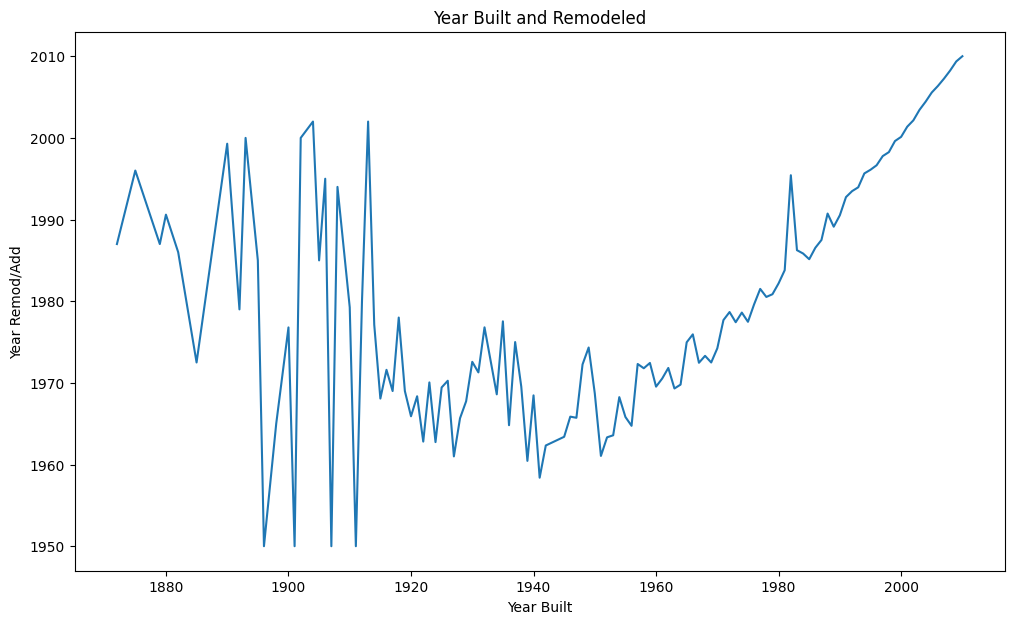

In [67]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_data_copy,
             x='Year Built',
             y='Year Remod/Add',
             errorbar=None)

plt.title("Year Built and Remodeled")

In [68]:
df_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [69]:
# checking correlation between features and target
df_data[['Year Built', 'Year Remod/Add', 'Gr Liv Area']].corr()

,Year Built,Year Remod/Add,Gr Liv Area
Year Built,1.000000,0.611444,0.239305
Year Remod/Add,0.611444,1.000000,0.318860
Gr Liv Area,0.239305,0.318860,1.000000


## Baseline Model

In [70]:
# HistGradientBoostingRegressor
X_feat = df_data[['Lot Area', 'Year Built', 'Full Bath',
             'Fireplaces', 'Pool Area','Wood Deck SF','BsmtFin SF 1']]
y_feat = df_data['SalePrice']


# List to store results
results = {}


# Run the experiment 10 times with different random splits
for i in range(10):
    print(f"Running iteration {i+1}/10...")

    # Different random split each time
    X_train, X_test, y_train, y_test = train_test_split(
        X_feat, y_feat, test_size=0.20, random_state=42 + i         # different seed each time
    )

    # Initialize models
    lr = LinearRegression()
    Ri = Ridge()
    hg = HistGradientBoostingRegressor(
        max_iter=1000,
        learning_rate=0.05,
        random_state=42,
    )
    rf = RandomForestRegressor(
        n_estimators=500,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    # Fit all models
    lr.fit(X_train, y_train)
    Ri.fit(X_train, y_train)
    hg.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Predict and calculate RMSE
    rmse_lr = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
    rmse_Ri = np.sqrt(mean_squared_error(y_test, Ri.predict(X_test)))
    rmse_hg = np.sqrt(mean_squared_error(y_test, hg.predict(X_test)))
    rmse_rf = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

   # Calculate R-squared scores
    r2_lr = r2_score(y_test, lr.predict(X_test))
    r2_Ri = r2_score(y_test, Ri.predict(X_test))
    r2_hg = r2_score(y_test, hg.predict(X_test))
    r2_rf = r2_score(y_test, rf.predict(X_test))


print(f"---------------------------")
print(f"LR RMSE Score", rmse_lr)
print(f"Ridge RMSE Score", rmse_Ri)
print(f"HistGradi RMSE Score", rmse_hg)
print(f"Radom RMSEScore", rmse_rf)
print(f"---------------------------")
print(f"LR", r2_lr)
print(f"Ridge", r2_Ri)
print(f"Hist", r2_hg)
print(r2_rf)

Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
---------------------------
LR RMSE Score 44207.59996148423
Ridge RMSE Score 44202.12534150261
HistGradi RMSE Score 39570.07831798938
Radom RMSEScore 34974.703653368146
---------------------------
LR 0.6293790464235962
Ridge 0.6294708353125984
Hist 0.7030591731275977
0.7680233990924379


### Baseline Average

In [102]:
average_rmse = (rmse_Ri + rmse_hg + rmse_rf) / 3
average_r2 = (r2_Ri + r2_hg + r2_rf) / 3
# mean score RMSE
mean_average_rmse = average_rmse.mean()
mean_average_r2 = average_r2
print(f"Average RMSE : {mean_average_rmse}")
print(f'Average R2: {mean_average_r2}')
print('-------------------------------')
print(f"Average RMSE of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: {average_rmse}")
print(f"Average R2 of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: {average_r2}")

Average RMSE : 39582.30243762004
Average R2: 0.7001844691775446
-------------------------------
Average RMSE of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: 39582.30243762004
Average R2 of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: 0.7001844691775446


In [71]:
print(feat_columns['SalePrice'].describe())

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64


#Task 7: Conceptualize the problem

In [72]:
# X and Y
x_model = df_data[num_columns]
y_model = df_data['SalePrice']

# X = Features # 2D
# Y = Target --  What we want to predict  # 1D

#Task 8: Perform Data-Split

In [73]:
# Preforming data split
X_train, X_test, y_train, y_test = train_test_split(x_model, y_model,random_state=42,train_size=0.25)

#Task 9: Choose the ML Method to follow

In [74]:
# Initialize models (ensure these are available)
lr = LinearRegression()
Ri = Ridge()
hg = HistGradientBoostingRegressor(
    max_iter=1000,
    learning_rate=0.05,
    random_state=42,
)
rf = RandomForestRegressor(
    n_estimators=500,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Fitting all models with the current X_train and y_train
lr.fit(X_train, y_train)
Ri.fit(X_train, y_train)
hg.fit(X_train, y_train)
rf.fit(X_train, y_train)

LinearRegression()

#Task 10: Train the ML Model

In [83]:
y_predict_lr = lr.predict(X_test)

#Task 11: Test the Model

In [84]:
# linear Regression Model
# testing the r2 score for linear Regression
# testing the Linear Regression model
lr.score(X_train,y_train)

# linear Regression Model
# Testing r2 score - use X_test and y_test
lr.score(X_test, y_test)

0.870119164995544

## Score the Model

In [85]:
r2 = r2_score(y_test,y_predict_lr)
r_squared_score = (r2 * 100)


mse = mean_squared_error(y_test,y_predict_lr)
rmse = np.sqrt(mse)

def model_score():
  print(f'R2 score {r2} so that give us {r_squared_score}')
  print(f'')
  print(f'MSE score {mse} so that give us {rmse}')

# # Calling Model score
model_score()

R2 score 0.870119164995544 so that give us 87.0119164995544

MSE score 804703087.874816 so that give us 28367.289046978316


In [86]:
print(df_data['SalePrice'].describe())
# beating the mean baseline by 50% reduction in error

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64


Average RMSE : 39582.30243762004
Average R2: 0.7001844691775446
-------------------------------
Average RMSE of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: 39582.30243762004
Average R2 of Ridge, HistGradientBoostingRegressor, and RandomForestRegressor: 0.7001844691775446


In [98]:
y_test

,SalePrice
1047,143000
2400,437154
1127,205950
1392,235000
679,138000
1746,188500
2361,88000
2915,140000
1393,140000
1653,197000


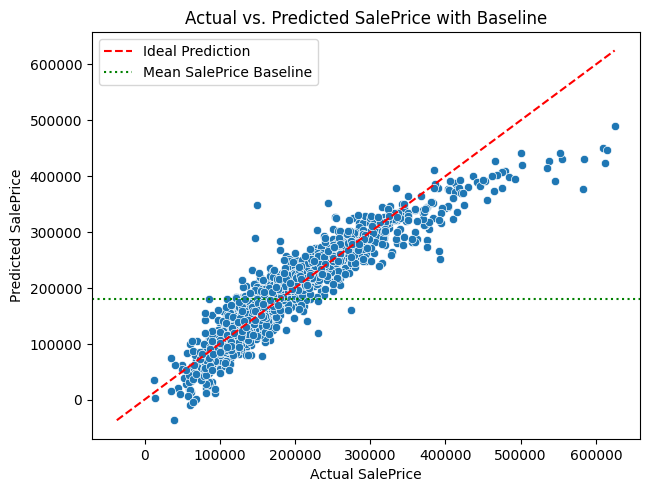

In [101]:
min_val = min(y_test.min(), y_predict_lr.min())
max_val = max(y_test.max(), y_predict_lr.max())

sns.scatterplot(x= y_test,
                y= y_predict_lr)

# prediction line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')

# baseline
mean_saleprice_baseline = y_test.mean()
plt.axhline(y=mean_saleprice_baseline, color='green', linestyle=':', label='Mean SalePrice Baseline')

# dsiplay
plt.tight_layout()
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice with Baseline')
plt.legend()
plt.show()

In [88]:
# Confirm everything is on the original price scale
print("Sample actual vs predicted:")
print(pd.DataFrame({
    'Actual': y_test[:5].round(0),
    'Predicted': y_predict_lr[:5].round(0),
    'Error': (y_test[:5] - y_predict_lr[:5]).round(0)
}))

Sample actual vs predicted:
      Actual  Predicted    Error
1047  143000   141855.0   1145.0
2400  437154   399747.0  37407.0
1127  205950   203570.0   2380.0
1392  235000   193945.0  41055.0
679   138000   149227.0 -11227.0
